In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [12]:
heart_data = pd.read_csv('HeartDiseaseData.csv')

In [4]:
heart_data.shape

(457, 14)

In [5]:
heart_data.columns

Index([u'Unnamed: 0', u'ID', u'Age', u'Sex', u'cp', u'trestbps', u'chol',
       u'fbs', u'restecg', u'thalach', u'exang', u'oldpeak', u'num', u'Place'],
      dtype='object')

In [6]:
heart_data.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp             object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
num             int64
Place          object
dtype: object

In [7]:
heart_data.drop(['ID', 'Unnamed: 0','num'], axis=1).describe()

,Age,trestbps,chol,thalach,oldpeak
count,457.000000,424.000000,431.000000,424.000000,421.000000
mean,50.962801,131.488208,200.048724,134.910377,0.622090
std,9.219588,18.829454,113.463794,24.251177,0.922115
min,28.000000,80.000000,0.000000,69.000000,-2.600000
25%,45.000000,120.000000,171.000000,118.000000,0.000000
50%,52.000000,130.000000,220.000000,135.000000,0.000000
75%,57.000000,140.000000,269.500000,150.000000,1.000000
max,75.000000,200.000000,603.000000,190.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f317a646a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3170a35290>]], dtype=object)

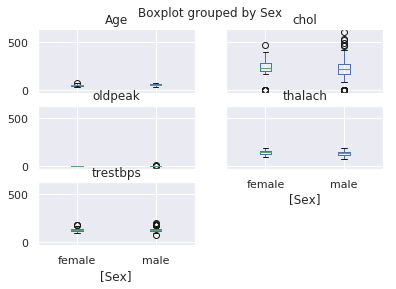

In [8]:
plot = heart_data.drop(['ID', 'Unnamed: 0','num'], axis=1)
plot.boxplot(by = "Sex")

In [9]:
heart_data.isnull().sum()

Unnamed: 0     0
ID             0
Age            0
Sex            0
cp             0
trestbps      33
chol          26
fbs           54
restecg        2
thalach       33
exang         33
oldpeak       36
num            0
Place          0
dtype: int64

In [ ]:
heart_data = heart_data.fillna(heart_data.mean())

In [10]:
heart_data = heart_data.dropna()

In [38]:
X = heart_data.drop('num', axis=1)
y = heart_data[['num']]

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [41]:
X = X.assign(Sex = le.fit_transform(X.Sex),
             cp = le.fit_transform(X.cp),
             fbs = le.fit_transform(X.fbs),
             restecg = le.fit_transform(X.restecg),
             exang = le.fit_transform(X.exang),
             Place = le.fit_transform(X.Place))


In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

In [43]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

<bound method NDFrame.as_matrix of      num
0      0
1      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
28     0
29     0
30     0
32     0
..   ...
406    0
407    1
409    0
415    1
416    0
418    1
419    0
421    1
422    1
424    0
426    0
429    0
431    0
432    1
433    1
437    1
438    1
439    0
440    1
442    0
443    1
444    1
446    1
447    1
448    0
450    0
451    0
452    1
453    1
456    1

[342 rows x 1 columns]>